In [1]:
pwd

'C:\\Users\\human\\Desktop\\수업자료\\데이터분석&시각화\\07 크롤링03'

In [7]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd

options=Options()
options.add_experimental_option('detach',True) #화면이 꺼지지 않고 유지
options.add_argument('--start-maximized') # 화면을 최대화
service=Service(ChromeDriverManager().install()) #크롬드라이버 자동 설치

driver=webdriver.Chrome(service=service, options=options)

# 1. url생성
url='https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EA%B5%AD%EB%82%B4%EC%97%AC%ED%96%89'

# 2. url접속
driver.get(url)
time.sleep(3)
html=driver.page_source
html

driver.quit()

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script><style type="text/css">@charset "UTF-8";[ng\\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <base href="/home">\n    <meta name="robots" content="noindex,nofollow">\n    <meta name="referrer" content="always">\n    <meta name="format-detection" content="telephone=no">\n    <link rel="shortcut icon" type="image/x-icon" href="https://section.blog.naver.com/favicon.ico?3">\n    \n\n\n\n\n \n\n\t\n\t\t<meta property="og:title" content="국내여행 : 네이버 블로그">\n\n\t\t\n\t\t\t\n\t\t\t\n\t\t\t<meta p
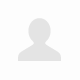
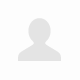

In [8]:
soup=bs(html,'html')
html

In [15]:
title_tags=soup.select('a.desc_inner')
res=[]
for i in title_tags:
    tmp={}
    tmp['제목']=i.text.strip()
    tmp['링크']=i['href']
    res.append(tmp)

In [16]:
df=pd.DataFrame(res)
df

,제목,링크
0,국내여행코스 울릉도 여행 둘째날 버스투어 A코스 관광,https://blog.naver.com/piil/223596761973
1,국내여행 무주 창고 대형 카페,https://blog.naver.com/dorothy_bet/223591417000
2,10월 국내여행 가볼만한곳 충남 공주 부여 백제문화제,https://blog.naver.com/sm011sm/223603389561
3,[국내여행] 나홀로 목포_해상케이블카 시간 팁!,https://blog.naver.com/sssel_123/223609239066
4,영주 반띵관광택시 로이쿠 지원할인 받아 국내여행 가볼만한곳,https://blog.naver.com/lemon8363/223582041842
5,롤리키드 캐리어 가격 착한 국내 여행가방,https://blog.naver.com/lim265/223570345206
6,자산가를 위한 첫 걸음 - 경매 국내여행 시작,https://blog.naver.com/realaroa/223558388651


In [17]:
df.to_csv('국내여행_블로그.csv')